In [1]:
import tensorflow as tf
import numpy as np

2023-06-10 18:44:23.568154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
x_ = tf.compat.v1.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.compat.v1.placeholder(tf.float32, shape=[4,1], name="y-output")

In [4]:
w1 = tf.Variable(tf.random.uniform([2,2], -1, 1), name="Weights1")
w2 = tf.Variable(tf.random.uniform([2,1], -1, 1), name="Weights2")

In [5]:
b1 = tf.Variable(tf.zeros([2]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")

In [6]:
z2 = tf.sigmoid(tf.matmul(x_, w1) + b1)
pred = tf.sigmoid(tf.matmul(z2, w2) + b2)

In [7]:
cost = tf.reduce_mean(((y_ * tf.math.log(pred)) + ((1 - y_) * tf.math.log(1.0 - pred))) * -1)

In [8]:
learning_rate = 0.01

In [9]:
train_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
XOR_X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

In [11]:
XOR_Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [12]:
init = tf.compat.v1.global_variables_initializer()

In [13]:
sess = tf.compat.v1.Session()

2023-06-10 18:44:25.353029: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
writer = tf.compat.v1.summary.FileWriter("./Downloads/XOR_logs", sess.graph)

In [15]:
sess.run(init)

2023-06-10 18:44:25.384069: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


In [16]:
for i in range(1000):
    sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})

In [17]:
Hasil_prediksi = sess.run(pred, feed_dict={x_: XOR_X, y_: XOR_Y})

In [18]:
print('Final Prediction', Hasil_prediksi)

Final Prediction [[0.493445  ]
 [0.52029705]
 [0.47737312]
 [0.50345683]]


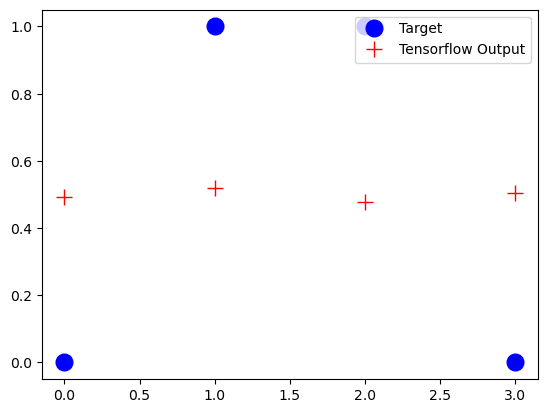

In [19]:
import matplotlib.pyplot as plt
plt.plot(XOR_Y, 'bo', label='Target', linewidth=2, markersize=12)
plt.plot(Hasil_prediksi, 'r+', label='Tensorflow Output', linewidth=2, markersize=12)
plt.legend(loc="upper right")
plt.show()